In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

## Load Dataset

In [3]:
raw_ecommerce = pd.read_csv('C:/Users/dell/Documents/DSrakamin/Finpro/Dataset.csv')

In [3]:
raw_ecommerce.columns = raw_ecommerce.columns.str.lower()

## EDA

### Descriptive Statistics

In [5]:
raw_ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12946 entries, 0 to 12945
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   administrative           12835 non-null  float64
 1   administrative_duration  12313 non-null  float64
 2   informational            12946 non-null  int64  
 3   informational_duration   12946 non-null  float64
 4   productrelated           12946 non-null  int64  
 5   productrelated_duration  12307 non-null  float64
 6   bouncerates              12872 non-null  float64
 7   exitrates                12946 non-null  float64
 8   pagevalues               12946 non-null  float64
 9   specialday               12946 non-null  float64
 10  month                    12946 non-null  object 
 11  operatingsystems         12422 non-null  float64
 12  browser                  12946 non-null  int64  
 13  region                   12946 non-null  int64  
 14  traffictype           

In [6]:
round(raw_ecommerce.isna().sum() / len(raw_ecommerce) * 100, 2)

administrative             0.86
administrative_duration    4.89
informational              0.00
informational_duration     0.00
productrelated             0.00
productrelated_duration    4.94
bouncerates                0.57
exitrates                  0.00
pagevalues                 0.00
specialday                 0.00
month                      0.00
operatingsystems           4.05
browser                    0.00
region                     0.00
traffictype                0.00
visitortype                0.00
weekend                    0.00
revenue                    0.00
dtype: float64

In [7]:
raw_ecommerce.duplicated().sum()

711

terdapat **12946** baris data, dengan jumlah attribut 18. Dari 18 attribut, dideteksi ada 5 attribut yang memiliki nilai kosong dengan total maksimal **data hilang sebesar 15.30%** dari keseluruhan data. dan terdapat **711** data duplikat

In [5]:
cats = ['month','weekend','specialday','region','operatingsystems','browser','traffictype','visitortype','revenue']
nums = ['administrative','administrative_duration','informational','informational_duration',
        'productrelated','productrelated_duration',
        'bouncerates','exitrates','pagevalues']

In [9]:
raw_ecommerce.describe()

,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,operatingsystems,browser,region,traffictype
count,12835.000000,12313.000000,12946.000000,12946.000000,12946.000000,12307.000000,12872.000000,12946.000000,12946.000000,12946.000000,12422.000000,12946.000000,12946.000000,12946.000000
mean,2.303857,80.370267,0.498841,34.136048,31.657655,1192.740077,0.022309,0.043266,5.875963,0.061270,2.123169,2.360497,3.144369,4.078248
std,3.314427,175.494016,1.263276,140.022848,44.202635,1910.216261,0.048681,0.048808,18.414670,0.198667,0.906264,1.718878,2.402477,4.025467
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,182.083333,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.000000,0.000000,0.000000,18.000000,599.583333,0.003112,0.025329,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,92.933333,0.000000,0.000000,38.000000,1470.522917,0.016933,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [6]:
raw_ecommerce[cats].astype(str).describe()

,month,weekend,specialday,region,operatingsystems,browser,traffictype,visitortype,revenue
count,12946,12946,12946,12946,12946,12946,12946,12946,12946
unique,10,2,6,9,9,13,20,3,2
top,May,False,0.0,1,2.0,2,2,Returning_Visitor,False
freq,3533,9929,11636,5031,6673,8360,4100,11072,10938


In [12]:
raw_ecommerce['revenue'].value_counts() / len(raw_ecommerce['revenue'])*100

revenue
False    84.489418
True     15.510582
Name: count, dtype: float64

### 1. Descriptive Statistics Insight

- A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?
- B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?
- C. Apakah ada kolom yang memiliki nilai summary agak aneh? (min/mean/median/max/unique/top/freq) 
---
- A. tipe data kolom operating system dapat menggunakan tipe data int,\
tipe data kolom month juga dapat menggunakan int. kolom lainnnya sudah sesuai.

- B. terdapat **12946** baris data, dengan jumlah attribut **18**. Dari 18 attribut, dideteksi ada **5 attribut** yang memiliki nilai kosong : administrative, administrative_duration, productrelated_duration, bouncerates, operatingsystems. dengan total maksimal data hilang sebesar **15.30%** dari keseluruhan data. dan **711** data duplikat

- C. 
- untuk atribut numerikal (nums) terdapat outlier pada masing-masing featurenya, dan sebaran nilai masing-masing feature merupakan sebaran *positively skewed*, karena nilai mean yang lebih besar dari nilai median nya.

- untuk atribut kategorikal (cats), atribut **revenue** dipilih sebagai target. tetapi atribut ini memiliki *imbalances*, dimana nilai False sebanyak 10938. sehingga perlu untuk disesuaikan ketika proses training

- atribut specialday juga memiliki class imbalances, dimana nilai 0.0 sebanyak 11636

## Univariate Analysis

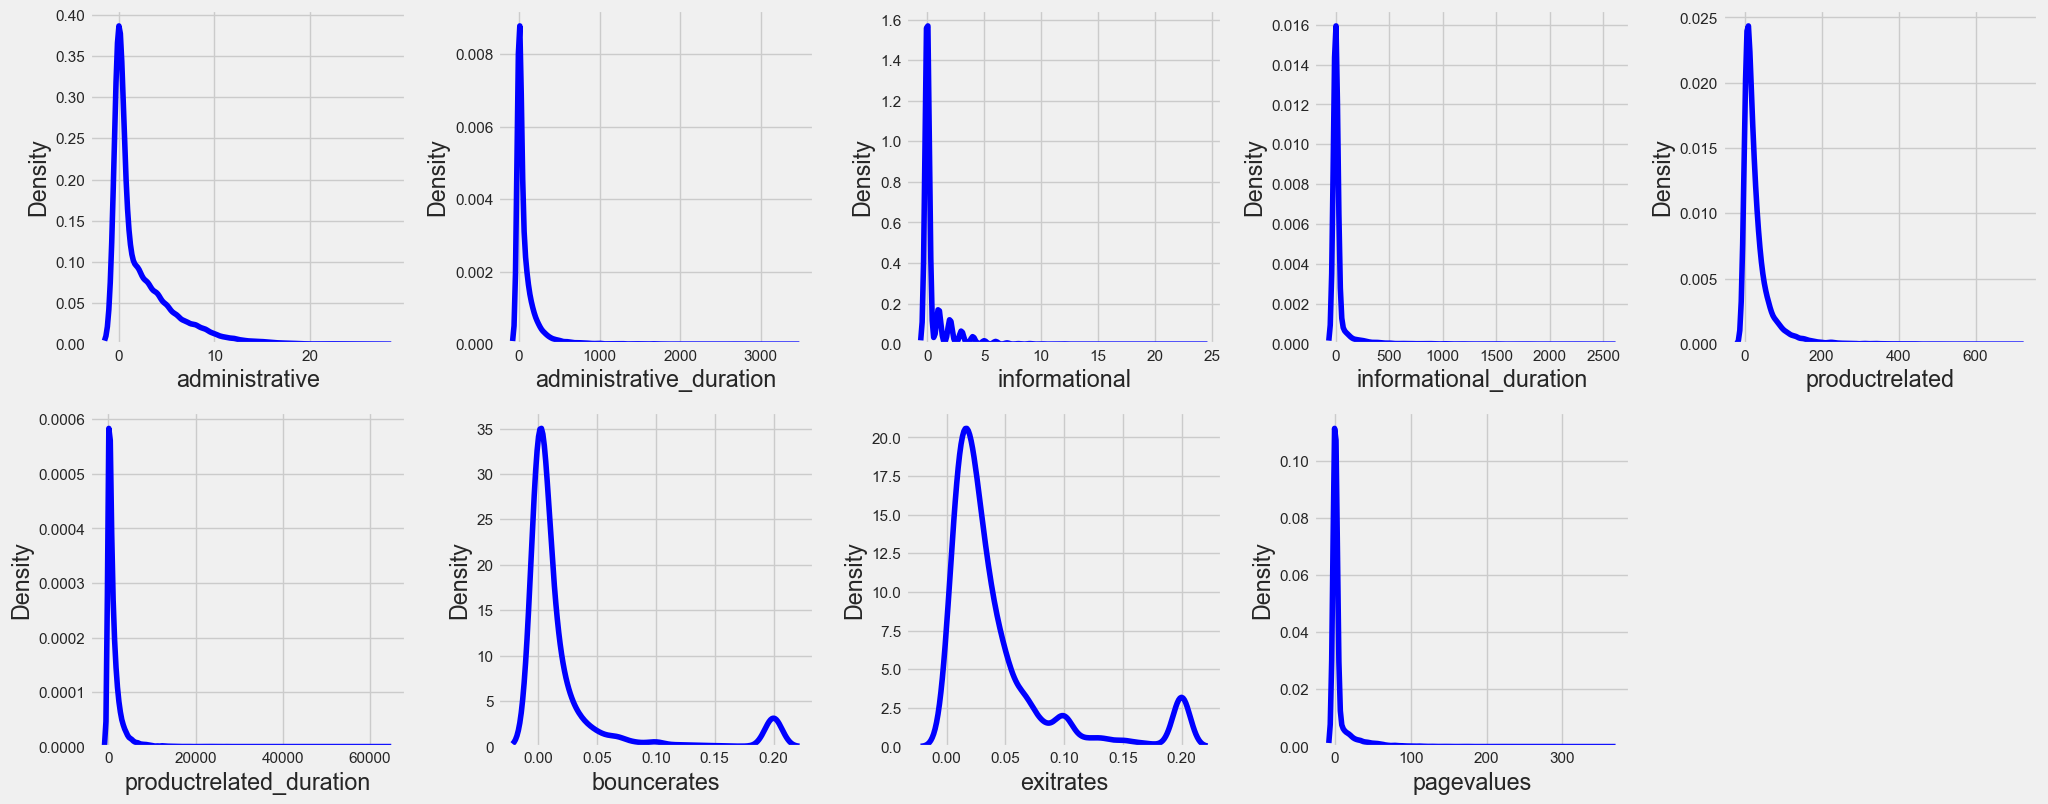

In [13]:
for i in range(0, len(nums)):
    plt.subplot(2,5, i+1)
    sns.kdeplot(x=raw_ecommerce[nums[i]], color='blue')
plt.tight_layout()

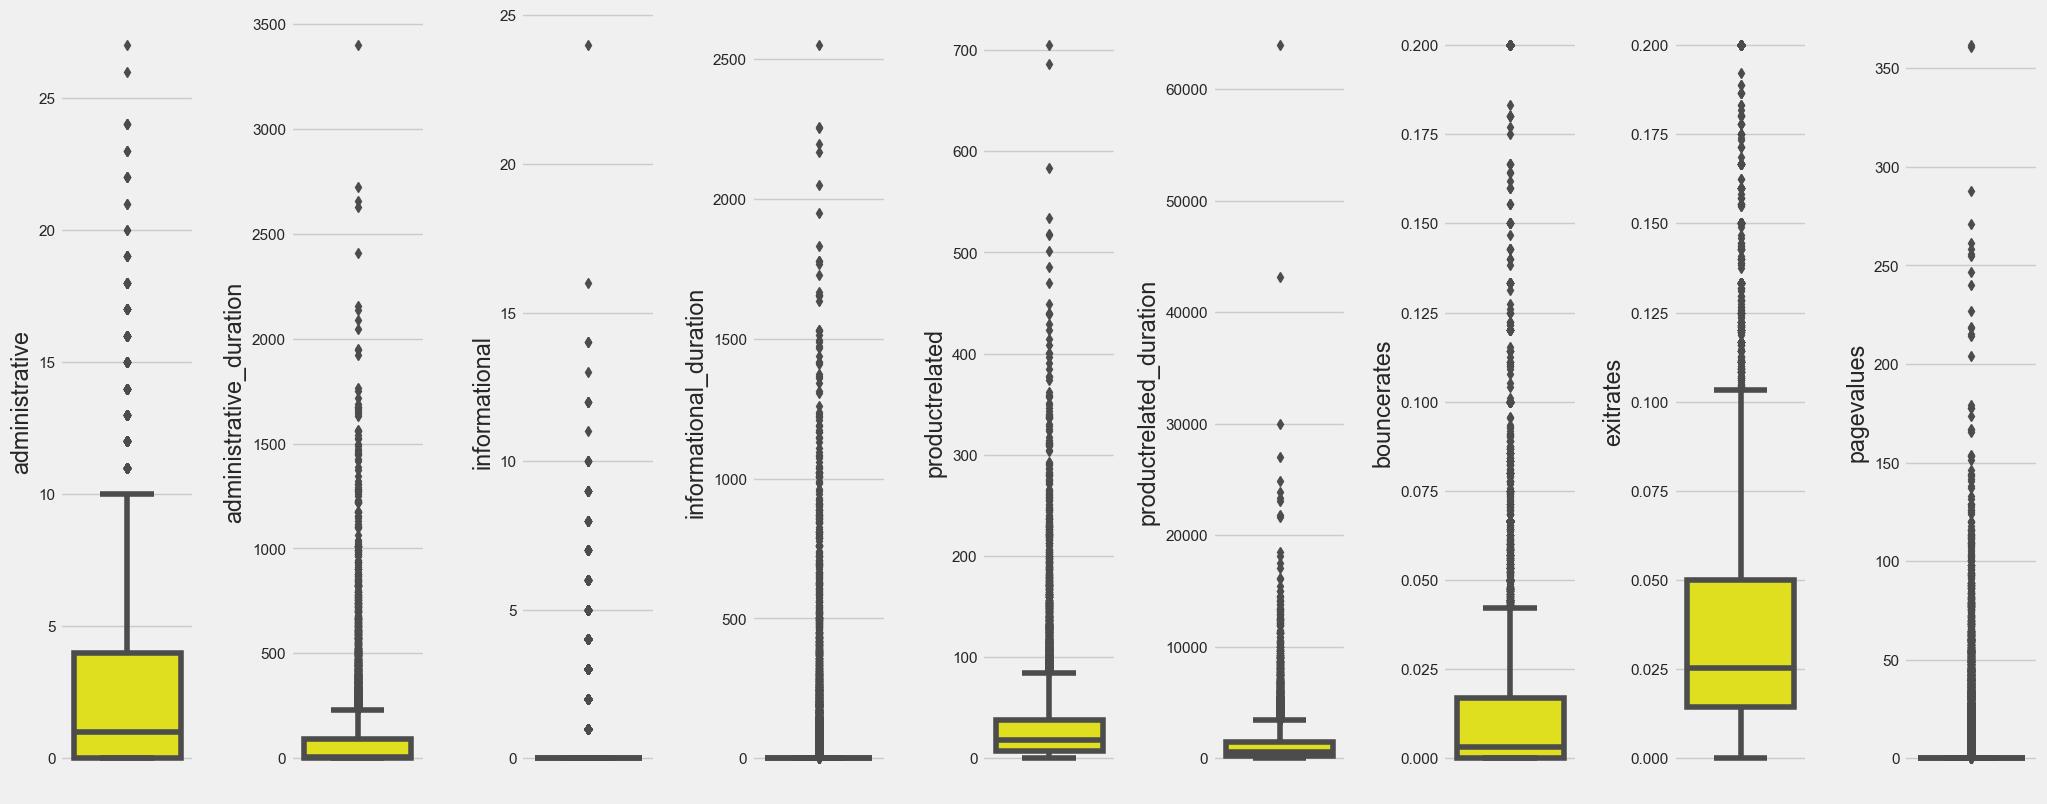

In [13]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(data=raw_ecommerce, y=nums[i], color='yellow')
plt.tight_layout()

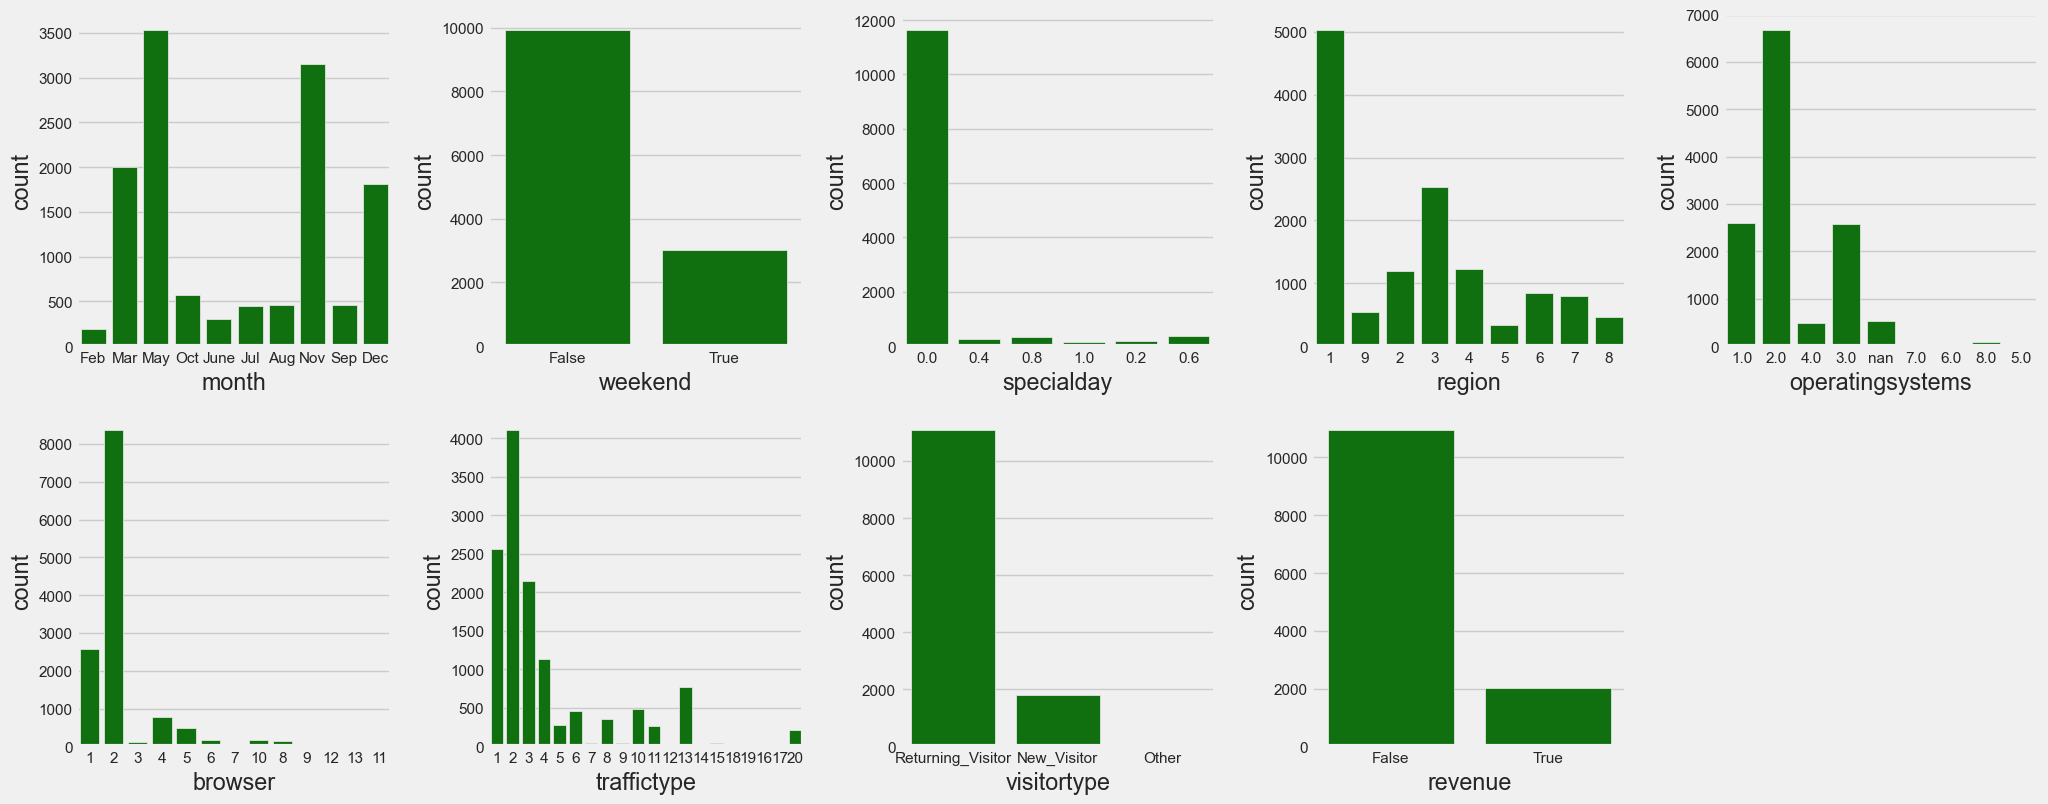

In [14]:
for i in range(0, len(cats)):
    plt.subplot(2,5, i+1)
    sns.countplot(x=raw_ecommerce[cats[i]], color='green')
plt.tight_layout()

### 2. Univariate Analysis Insight
Gunakan visualisasi untuk melihat distribusi masing-masing kolom (feature maupun target). Tuliskan hasil observasinya, misalnya jika ada suatu kolom yang distribusinya menarik (misal skewed, bimodal, ada outlier, ada nilai yang mendominasi, kategorinya terlalu banyak, dsb). Jelaskan juga apa yang harus di-follow up saat data pre-processing.

---
untuk kolom numerikal berikut ini memiliki distribusi positively skewed dan juga memiliki outlier:
- 'administrative'
- 'administrative_duration'
- 'informational'
- 'informational_duration'
- 'productrelated'
- 'productrelated_duration'
- 'bouncerates'
- 'exitrates'
- 'pagevalues'

Untuk tahap preprocessing dapat dilakukan, handling outlier dan feature transformation.

Untuk kolom kategorikal :
- 'month' : jumlah data didominasi bulan: May, Nov, Mar, Dec
- 'weekend' : didominasi oleh nilai 'False'
- 'specialday' : kunjungan situs mayoritas dilakukan saat, jauh dari specialday (hari khusus)
- 'region' : observasi menunjukan user region 1 mendominasi
- 'operatingsystem' : yang digunakan banyak user 2, 1, 3, 4
- 'browser' : jenis 2 mendominasi data dari 13 jenis browser
- 'traffictype' : jenis traffic yang paling banyak membawa user merupakan traffic 2, 1, 3
- 'visitortype' : kunjungan mayoritas dilakukan oleh returning_visitor
- 'revenue' : sebanyak 84.48% dari kunjungan tidak melakakukan pembelian / tidak menghasilkan pendapatan

Untuk kolom revenue sebagai target perlu dilakukan imbalances handling\
kolom visitortype dan month, dapat dilakukan feature encoding agar dapat dilakukan algoritma korelasi\

## Multivariate Analysis

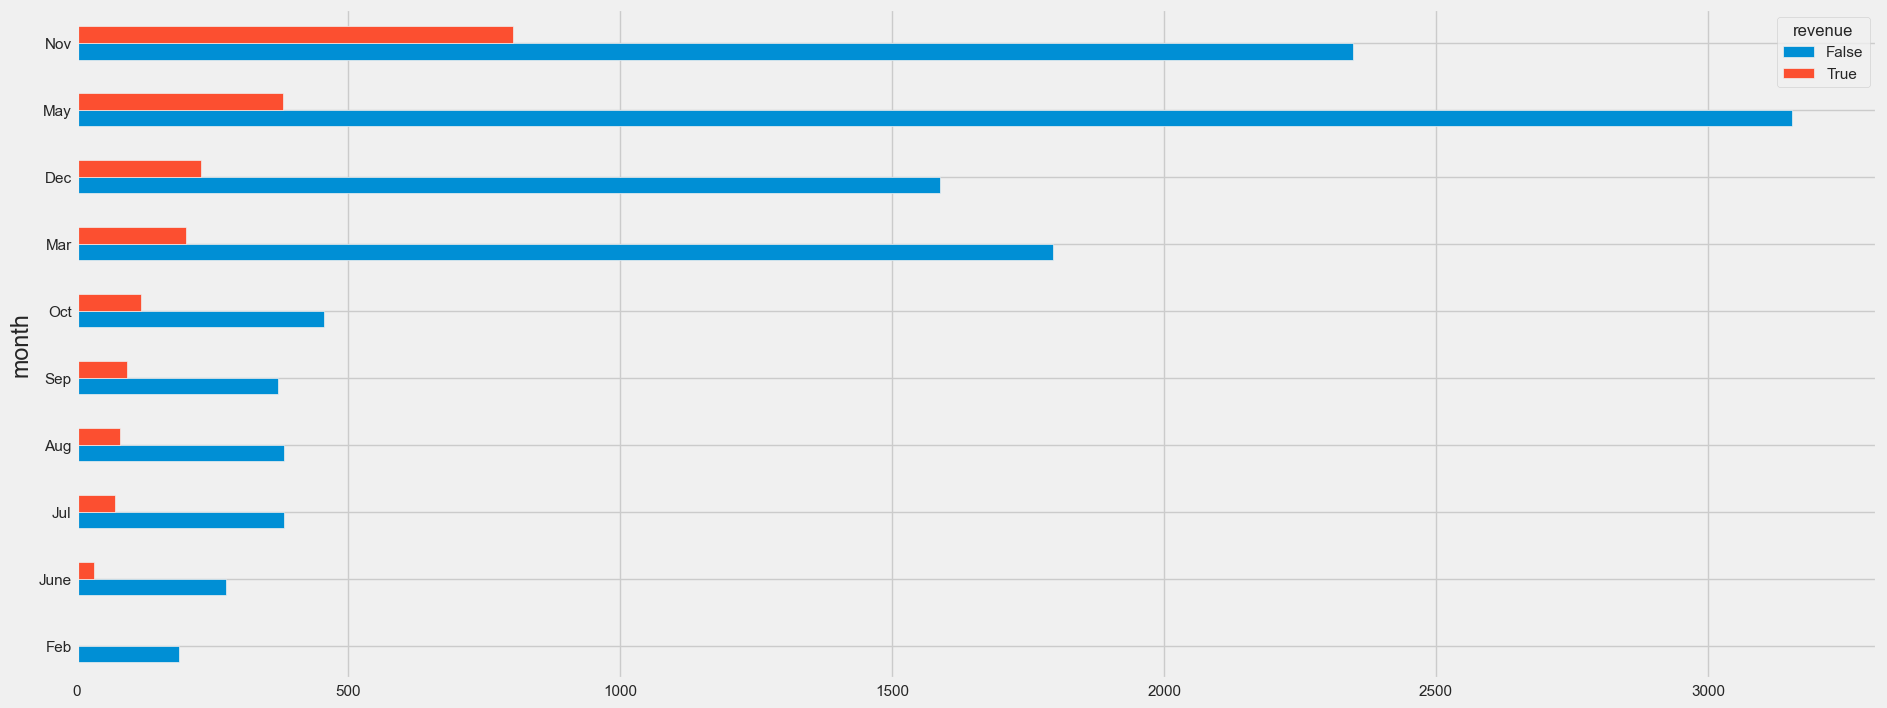

In [6]:
import matplotlib.pyplot as plt

month_revenue       = raw_ecommerce.groupby(['month', 'revenue'])['revenue'].count().reset_index(name='count')
month_revenue_pivot = month_revenue.pivot_table(index='month', columns='revenue', values='count')

month_revenue_pivot.sort_values(by=[True, False], ascending=True).plot(kind='barh', stacked=False)
plt.show()

Kunjungan user pada platform, yang menghasilkan revenue didominasi pada bulan **November**, Sementara bulan **Februari** memiliki kunjungan yang menghasilkan revenue yang paling sedikit (3 kunjungan). 

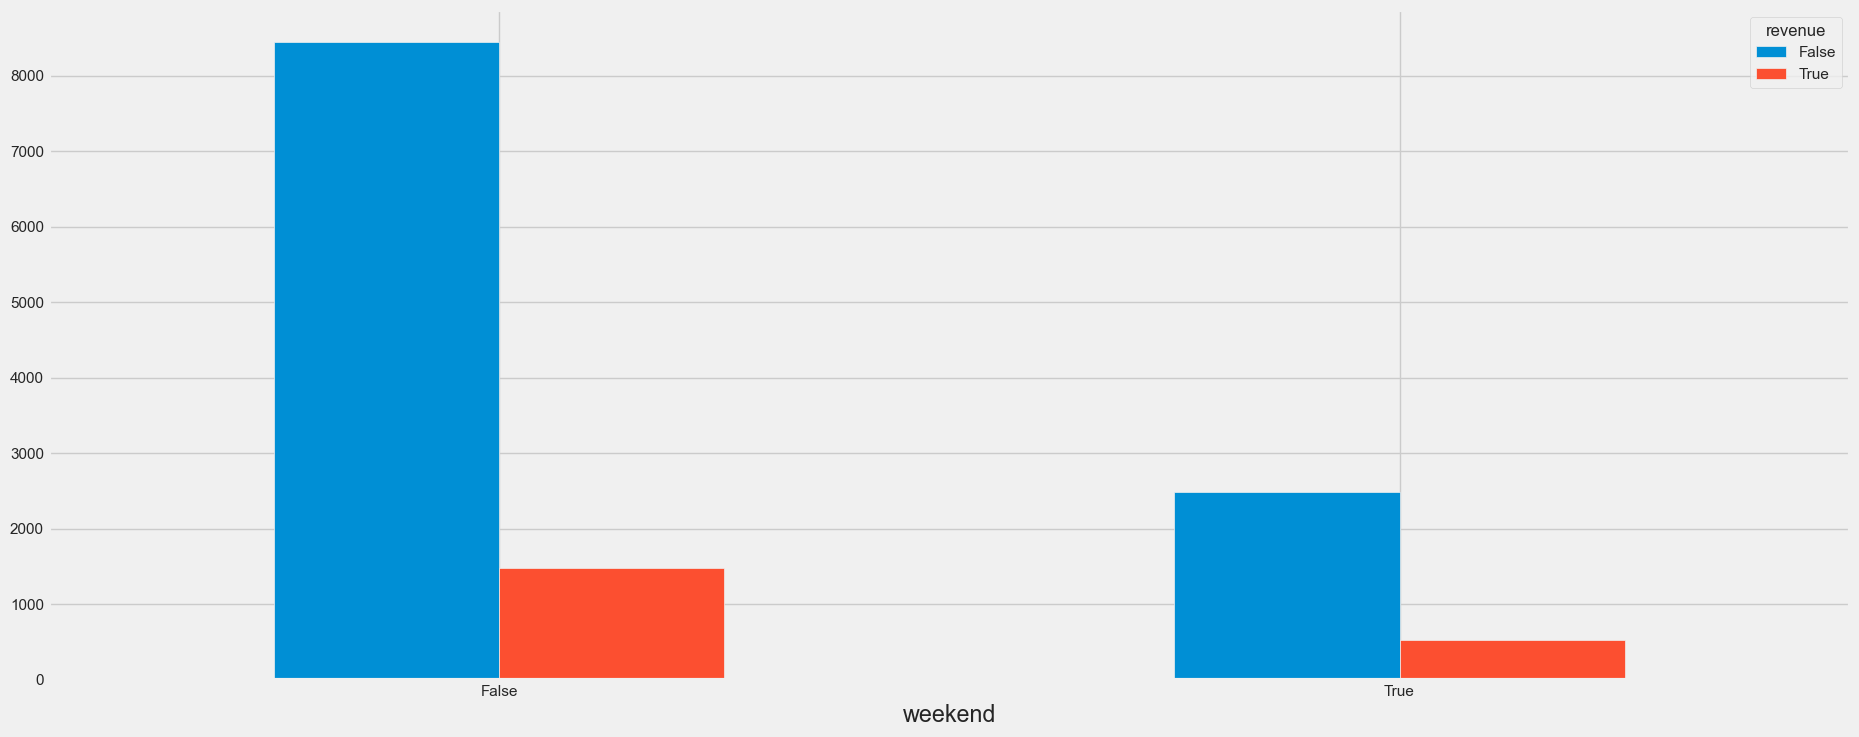

In [7]:
weekend_revenue       = raw_ecommerce.groupby(['weekend', 'revenue'])['revenue'].count().reset_index(name='count')
weekend_revenue_pivot = weekend_revenue.pivot_table(index='weekend', columns='revenue', values='count')

weekend_revenue_pivot.sort_values(by=[True,False], ascending=False).plot(kind='bar', stacked=False)
plt.xticks(rotation=0)
plt.show()

Kunjungan user dan revenue yang didapatkan pada akhir pekan lebih sedikit dibandingkan pada weekday

<Axes: ylabel='region'>

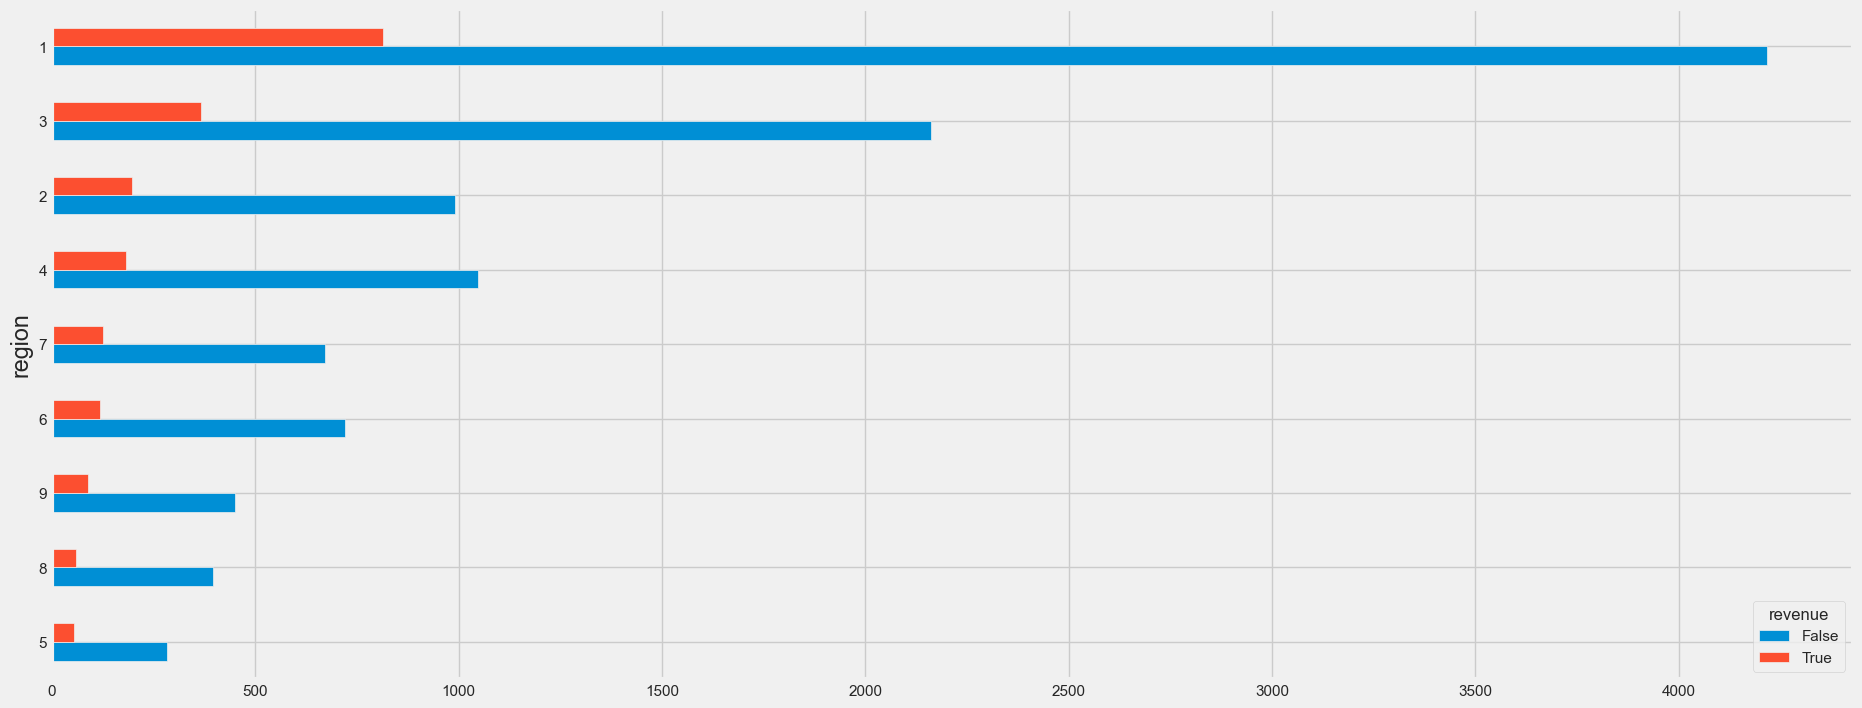

In [29]:
region_revenue       = raw_ecommerce.groupby(['region','revenue'])['revenue'].count().reset_index(name='count')
region_revenue_pivot = region_revenue.pivot_table(index='region',columns='revenue', values='count')

region_revenue_pivot.sort_values(by=[True,False], ascending=True).plot(kind='barh', stacked=False)

region yang menghasilkan mayoritas revenue berasal dari region 1

In [116]:
region_revenue_pivot

revenue,False,True
region,,
1,4217,814
2,992,198
3,2161,367
4,1047,182
5,282,55
6,721,118
7,672,125
8,397,60
9,449,89


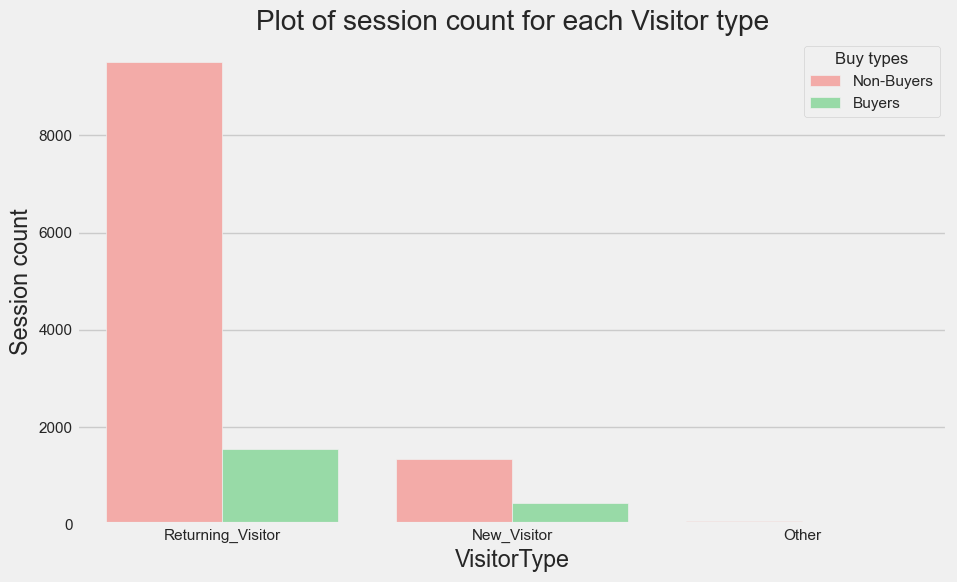

In [4]:
#Group df
visitor_df = raw_ecommerce.groupby(['VisitorType', 'Revenue'])['Revenue'].size().reset_index(name='cnt').sort_values('cnt', ascending=False)

#Change name
visitor_df.loc[visitor_df['Revenue']==True, 'Revenue']  = 'Buyers'
visitor_df.loc[visitor_df['Revenue']==False, 'Revenue'] = 'Non-Buyers'

#Plot
plt.figure(figsize=(10, 6))
colors = sns.color_palette('pastel')[2:4][::-1]
sns.barplot(data=visitor_df, 
            x='VisitorType', 
            y='cnt', 
            hue='Revenue',
            palette=colors)
plt.legend(title='Buy types')
plt.ylabel("Session count")
plt.title("Plot of session count for each Visitor type")
plt.show()

The bar plot reveals that Returning Visitors account for a higher session count than New Visitors. However, the proportion of Buyers among Returning Visitors is significantly lower than Non-Buyers. In contrast, the proportion of Buyers among New Visitors is closer to that of Non-Buyers. This indicates that

While Returning Visitors are more numerous, New Visitors have a relatively higher rate of purchase.

<Axes: xlabel='exitrates', ylabel='pagevalues'>

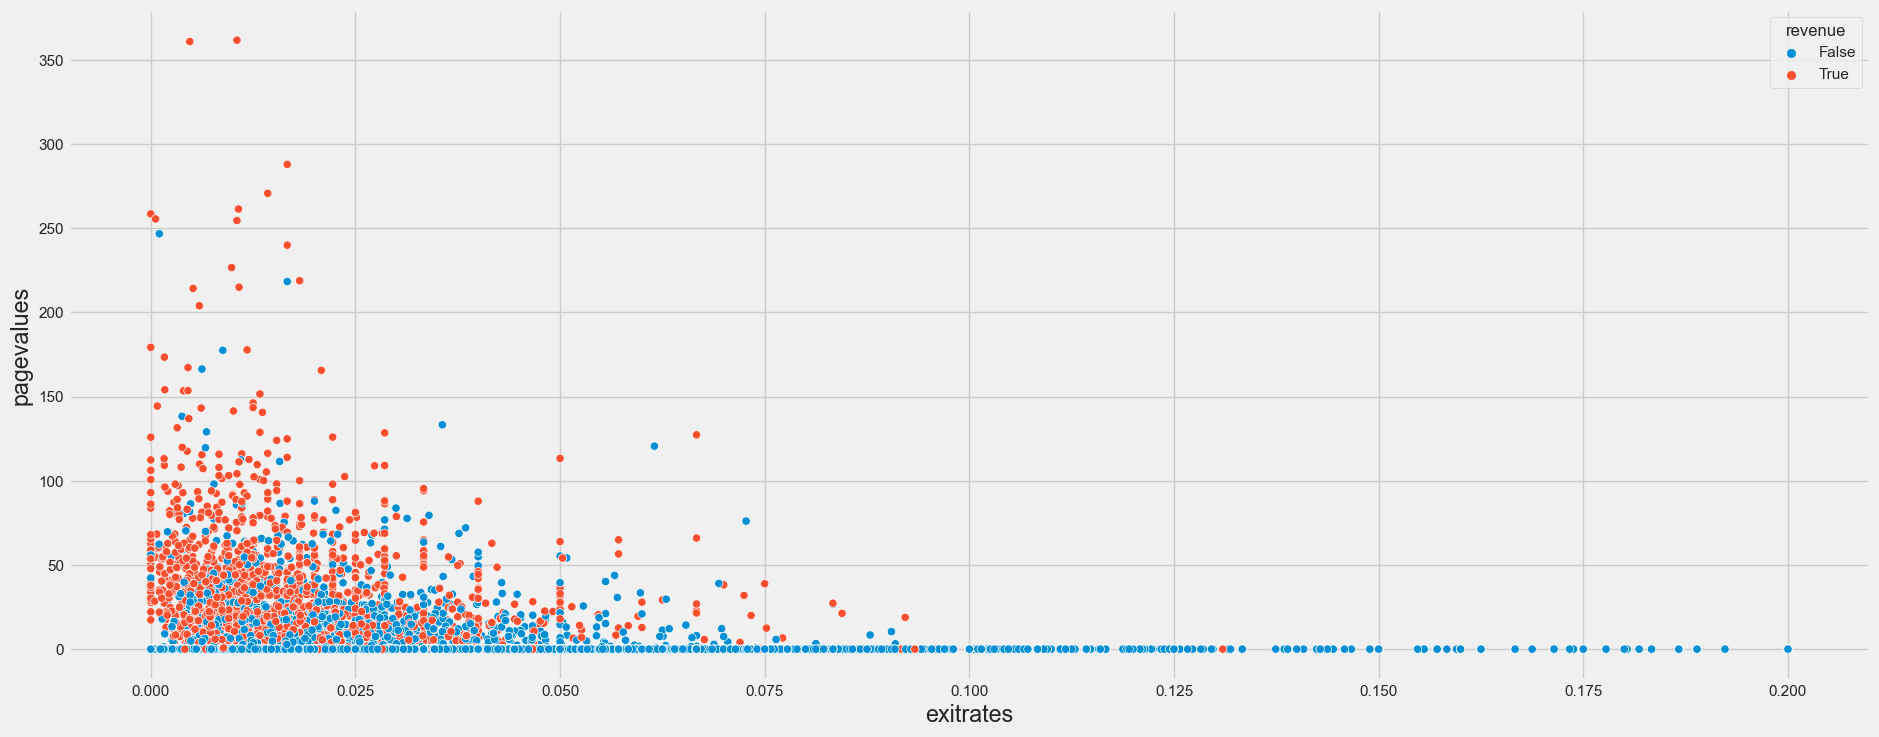

In [16]:
sns.scatterplot(x='exitrates', y='pagevalues', hue='revenue', data=raw_ecommerce)

Scatterplot ini menunjukan bahwa semakin tinggi pagevalues maka exitrates semakin rendah,<br>
revenue dihasilkan berkorelasi positif dengan pagevalues

<Axes: xlabel='productrelated', ylabel='pagevalues'>

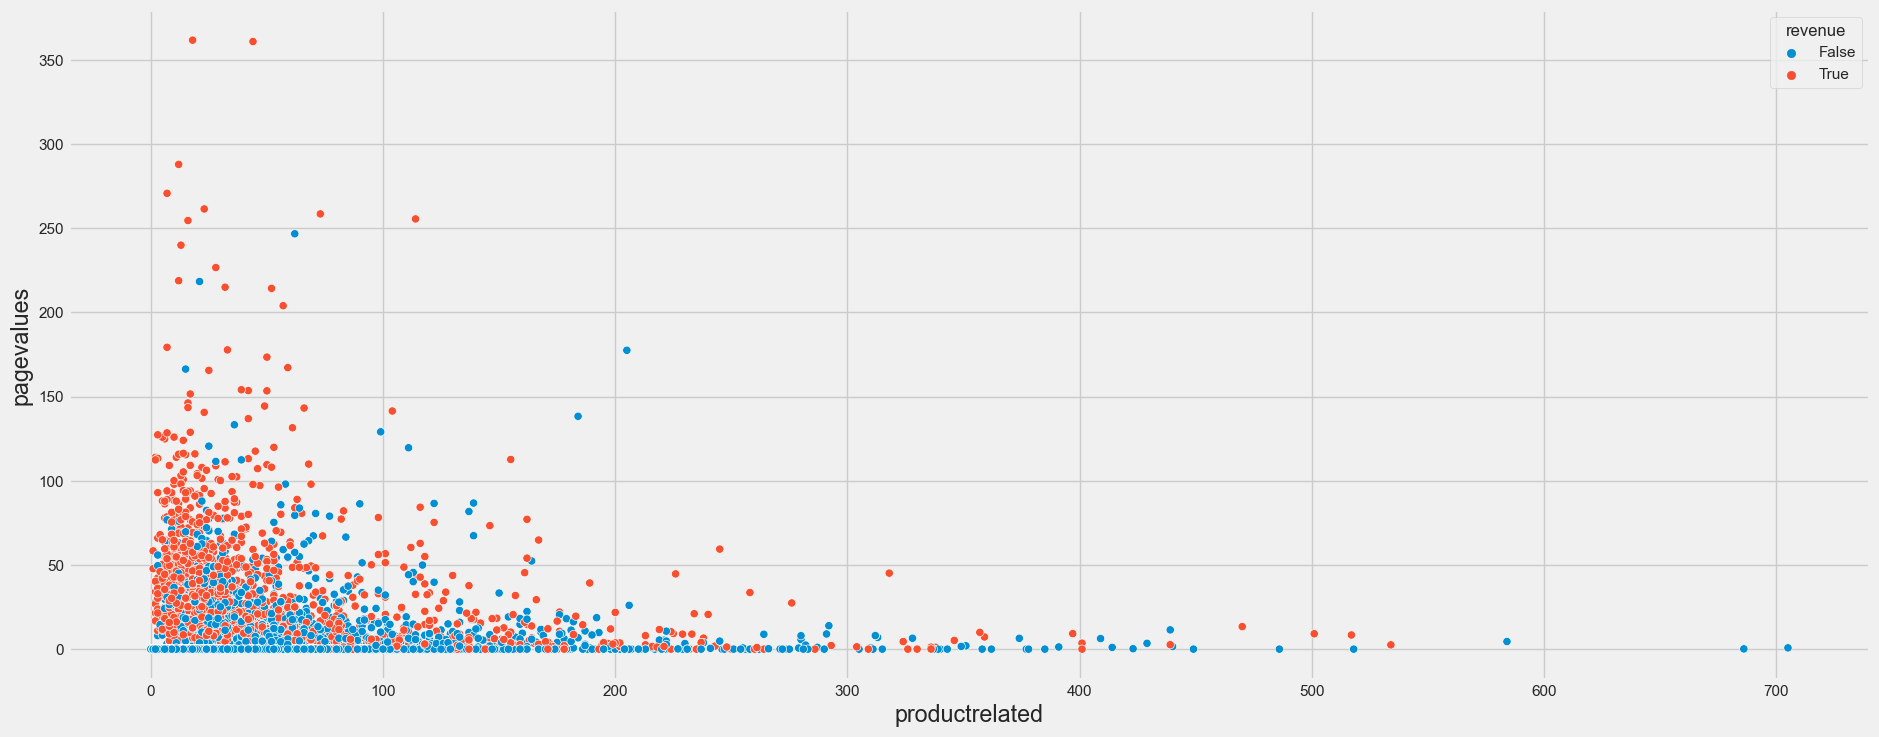

In [11]:
sns.scatterplot(x='productrelated', y='pagevalues', hue='revenue', data=raw_ecommerce)

<Axes: xlabel='exitrates', ylabel='bouncerates'>

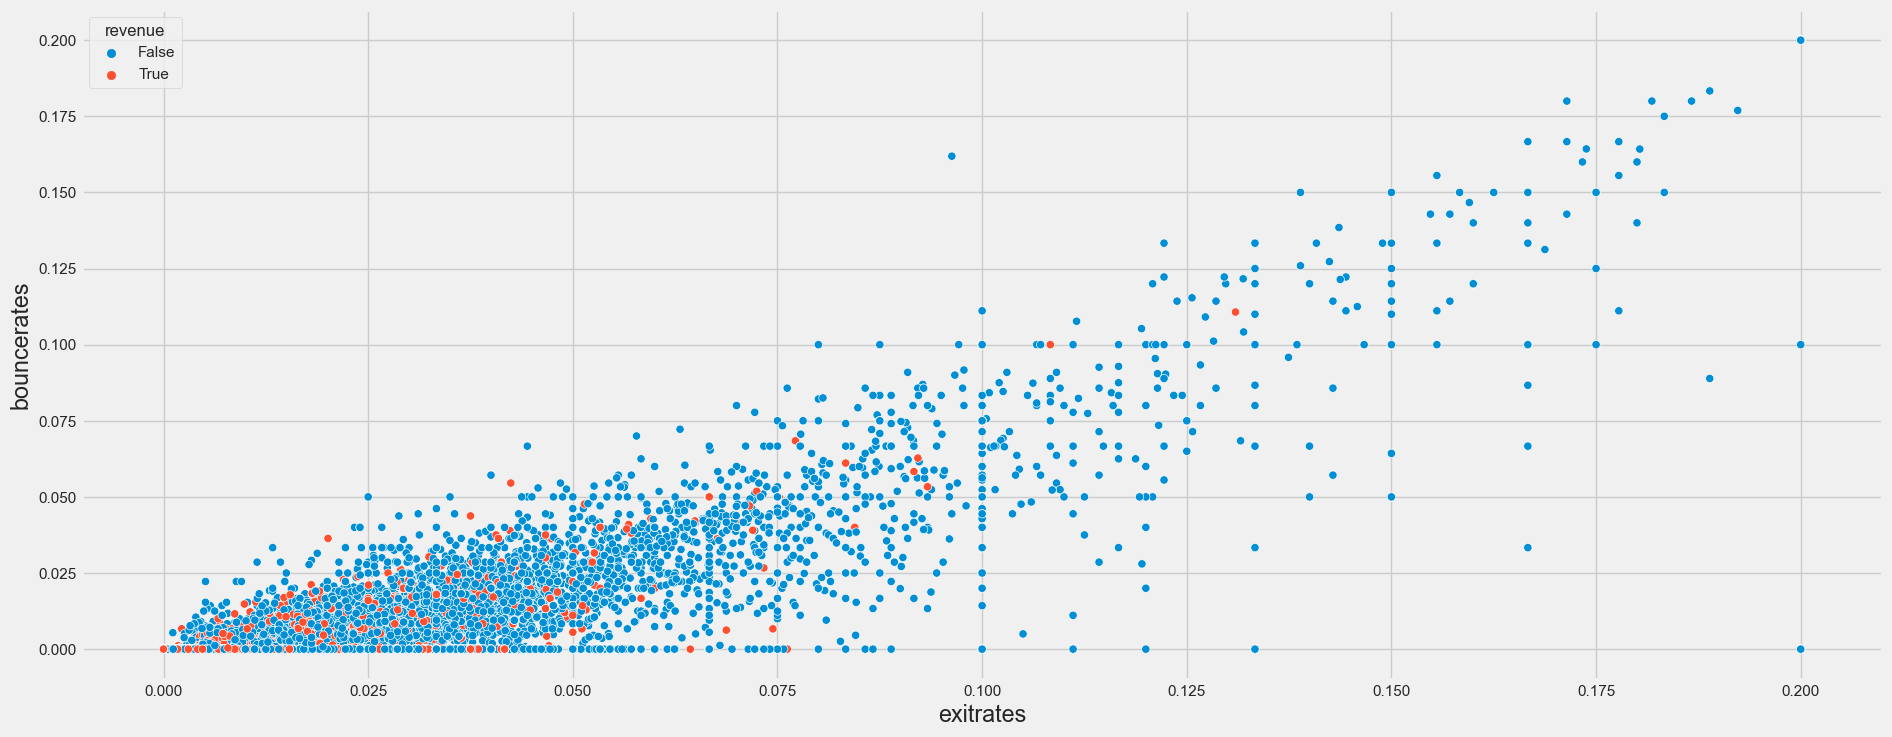

In [8]:
sns.scatterplot(data=raw_ecommerce, x='exitrates', y='bouncerates', hue='revenue')

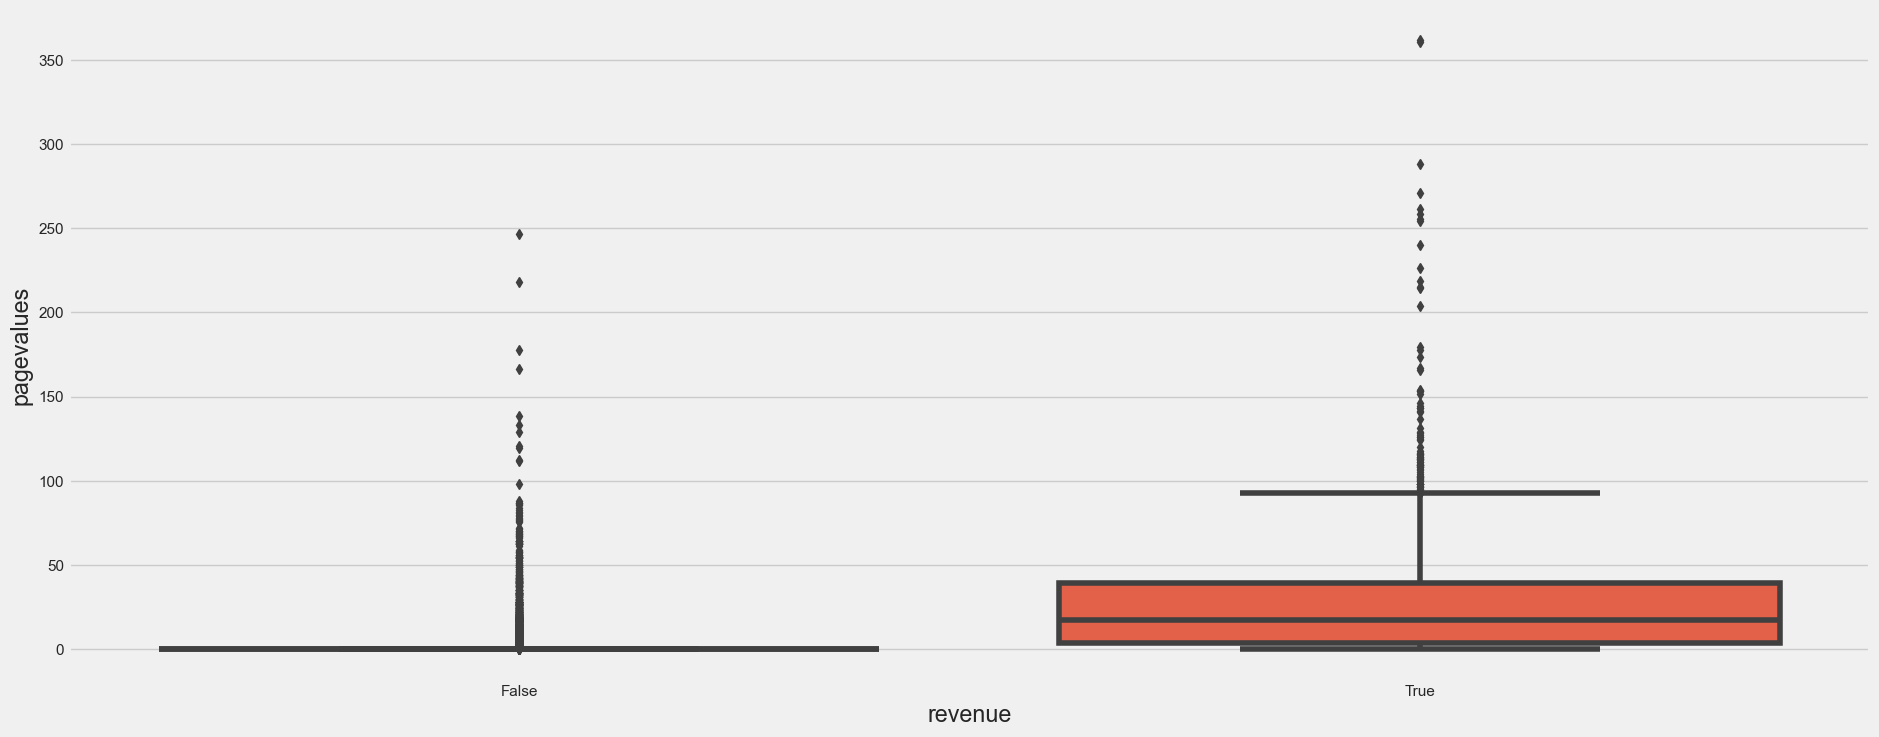

In [14]:
sns.boxplot(data=raw_ecommerce, y='pagevalues', x='revenue')
plt.show()

In [8]:
kor = nums +['weekend', 'specialday', 'region', 'operatingsystems', 'browser', 'traffictype', 'revenue']

<Axes: >

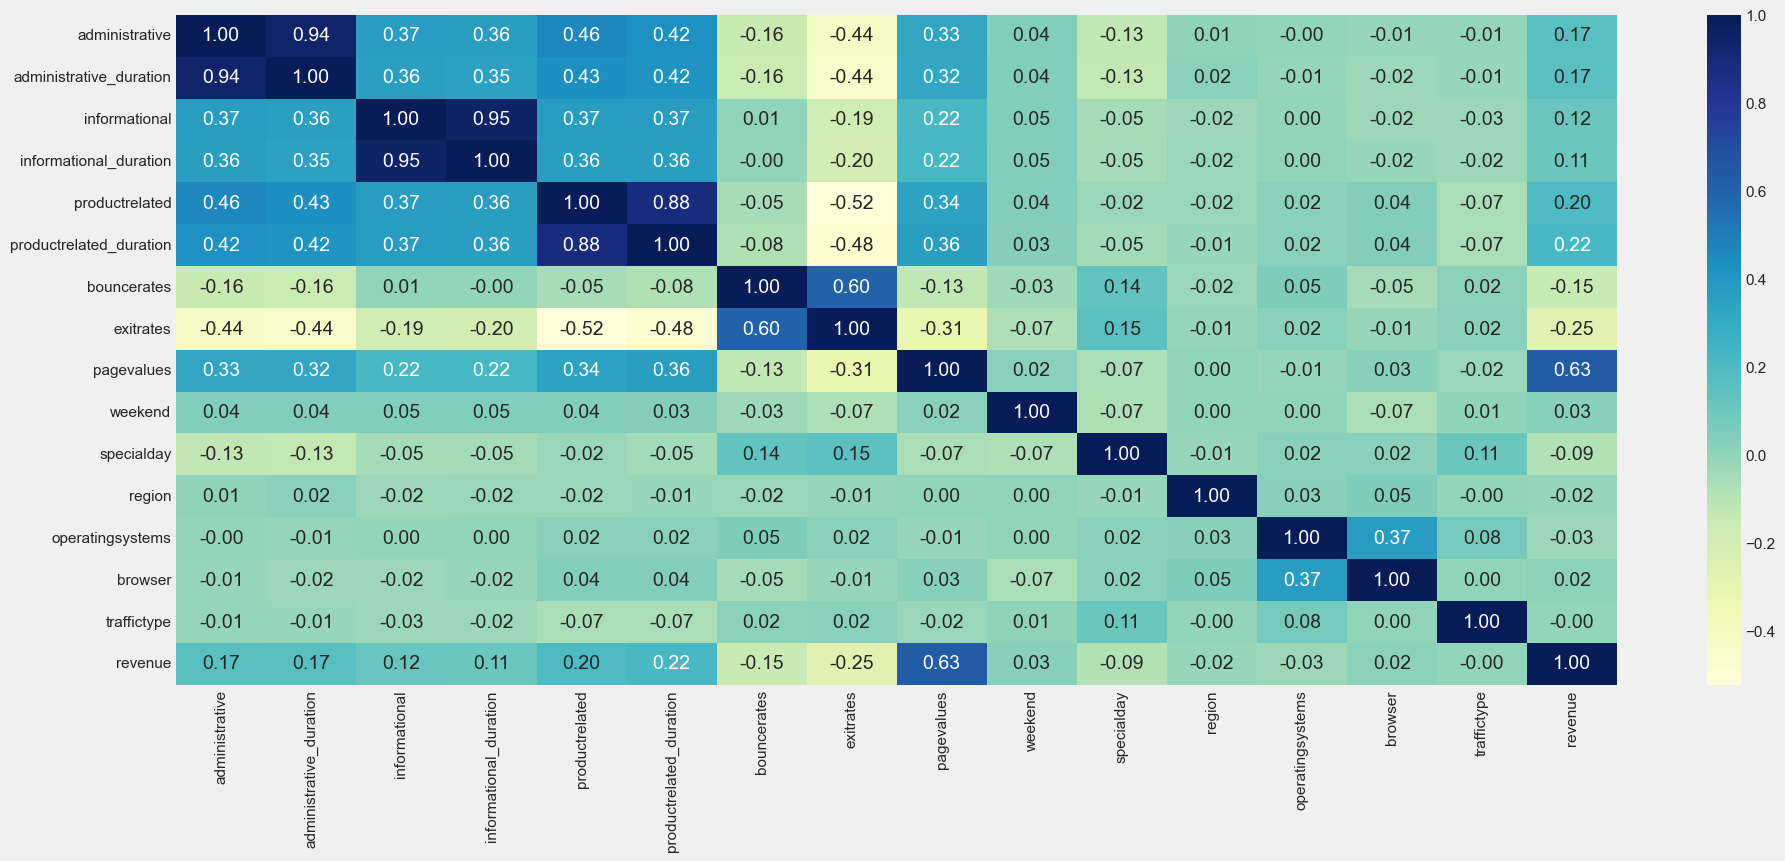

In [57]:
#spearman correlation method
sns.heatmap(raw_ecommerce[kor].corr(method='spearman'), cmap='YlGnBu',annot=True,fmt='.2f')

<Axes: >

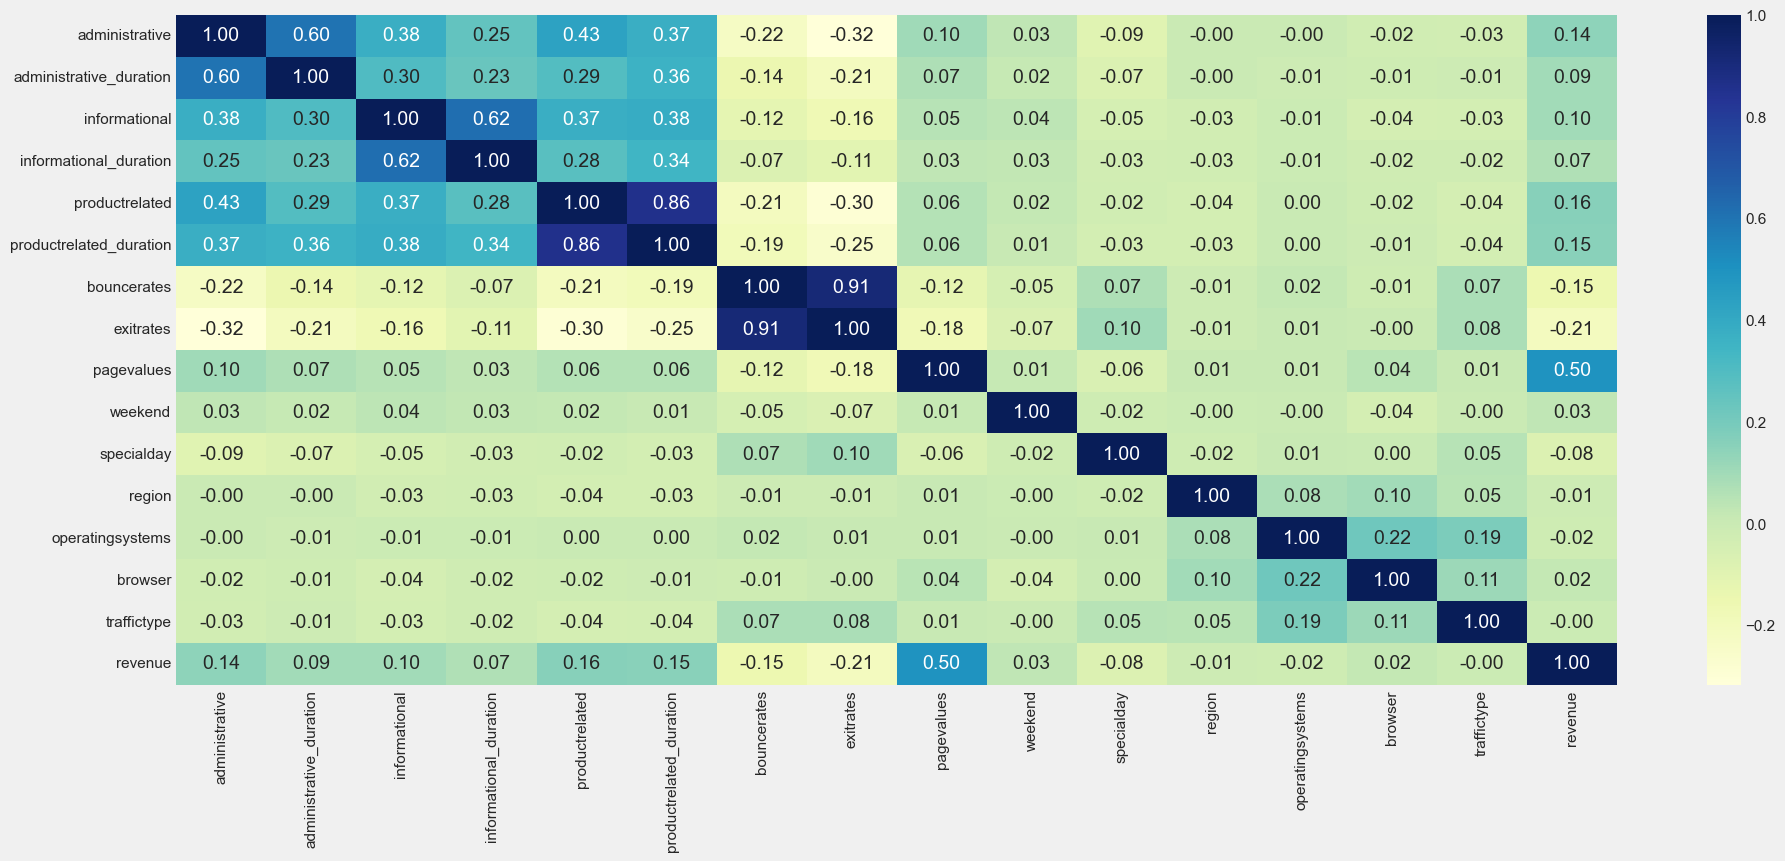

In [9]:
#pearson correlation method
sns.heatmap(raw_ecommerce[kor].corr(), cmap='YlGnBu',annot=True,fmt='.2f')

### 3. Multivariate Analysis Insight

Lakukan multivariate analysis (seperti correlation heatmap dan category plots, sesuai yang diajarkan di kelas). Tuliskan hasil observasinya, seperti:
- A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana saja yang paling relevan dan harus dipertahankan?
- B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu dilakukan terhadap feature itu?

Tuliskan juga jika memang tidak ada feature yang saling berkorelasi

---
#### 3A.
berdasarkan hasil korelasi heatmap yang ditampilkan, terdapat korelasi yang tinggi antara fitur :<br>
- productrelated dengan productrelated_duration (0.88)
- administrative dengan administrative_duration (0.94)
- informational dengan informational_duration   (0.95)
- bounce_rates dengan exitrates                 (0.60)
<br>

maka antara salah satu fitur yang berkorelasi tinggi, akan di drop berdasarkan korelasi yang rendah terhadap target **revenue**.

fitur **pagevalues** memiliki korelasi yang tinggi/*relevan* terhadap target. sebesar (0.63)

ada kemungkinan fitur month dan visitortype berkorelasi tinggi terhadap target, maka perlu encoding untuk tahap preprocessing dan melihat korelasinya

#### 3B.
fitur :
- administrative
- informational
- productrelated

Berkorelasi positif dengan fitur **pagevalues**

fitur browser dan operatingsystem juga memiliki korelasi positif (0.37)

### 4. Business Insight & Reccomendation



**Insight**

- Revenue yang didapatkan dari keseluruhan kunjungan adalah 15.51%. yang mana revenue tersebut mayoritas di hasilkan pada kunjungan bulan November, terdapat 803 kunjungan yang menghasilkan revenue, dari total 3151 kunjungan.

- Bulan May memiliki kunjungan yang paling banyak diantara yang lain terdapat total kunjungan 3533 akan tetapi, hanya 379 dari total kunjungan yang menghasilkan revenue.

- Februari merupakan bulan yang paling sedikit dikunjungi user. memiliki 191 total kunjungan dan hanya memiliki 3 kunjungan yang menghasilkan revenue.

- Kunjungan user dan revenue yang didapatkan pada akhir pekan lebih sedikit dibandingkan pada weekday. (weekend 3.017) / (weekday 9.929).

- region yang menghasilkan mayoritas revenue merupakan region **1**, 814 kunjungan menghasilkan revenue dari 5.031 total kunjungan. sedangkan region yang memiliki kunjungan paling sedikit adalah region **5**, 55 kunjungan menghasilkan revenue dari 337 total kunjungan yang berasal dari region 5.

- Berdasarkan Analisis dan Korelasi, menunjukan bahwa semakin tinggi pagevalues maka exitrates semakin rendah, dan juga revenue dihasilkan berkorelasi positif dengan pagevalues.

- productrelated memiliki korelasi yang tinggi terhadap revenue

---

**Business Recommendation**

- untuk region yang masih rendah pengunjung <1000 (2,5,6,7,8,9) tim marketing dapat menampilkan halaman web yang memiliki pagavalues yang tinggi, dan juga menampilkan rekomendasi yang relevan dengan halaman web yang yang dikunjungi user (product related). strategi marketing tersebut dapat dilakukan pada weekday, agar mencapai audience yang luas berdasarkan hasil analisis total kunjungan user pada halaman web.

---

**Metrics**

- Revenue

In [32]:
region_revenue_pivot.sort_values(by=[True,False], ascending=False)

revenue,False,True
region,,
1,4217,814
3,2161,367
2,992,198
4,1047,182
7,672,125
6,721,118
9,449,89
8,397,60
5,282,55


In [28]:
weekend_revenue_pivot

revenue,False,True
weekend,,
False,8449,1480
True,2489,528


In [33]:
month_revenue_pivot.sort_values(by=[True,False], ascending=False)

revenue,False,True
month,,
Nov,2348,803
May,3154,379
Dec,1588,228
Mar,1796,201
Oct,455,119
Sep,371,93
Aug,382,79
Jul,381,70
June,275,33
